# info about the data

Dataset Description
Overview

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

For "Embarked" column, C = Cherbourg, Q = Queenstown, S = Southampton<br> And I am going to assign<br> 0 = Cherbourg (C),<br> 1 = Queenstown (Q),<br> 2 = Southampton (S)

For Survived column, 0 means 'No' and 1 means 'Yes'<br>
For Sex column, 0 means 'Male' and 1 means 'Female'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df1=pd.read_csv('train.csv')

In [13]:
df2=pd.read_csv('test.csv')

In [38]:
df2.shape

(418, 11)

In [19]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df1.shape

(891, 12)

In [146]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Exploratory data analysis

In [59]:
df1['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

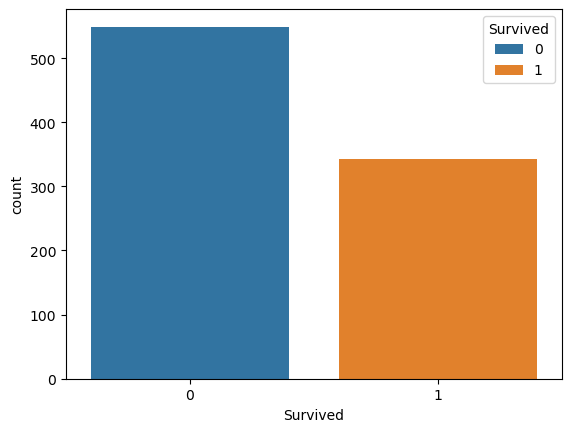

In [48]:
sns.countplot(x=df1['Survived'], hue=df1['Survived'])

This shows about 550 people died, and about340 people survived

<Axes: xlabel='Survived', ylabel='count'>

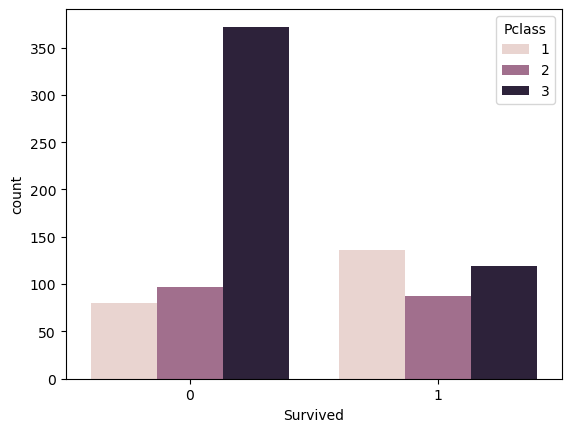

In [64]:
sns.countplot(x=df1['Survived'], hue=df1['Pclass'])

This shows that from the survived passangers, about 140 are from 1st class, about 80 are from 2nd class, and about 130 are from 3rd class.

<Axes: xlabel='Survived', ylabel='count'>

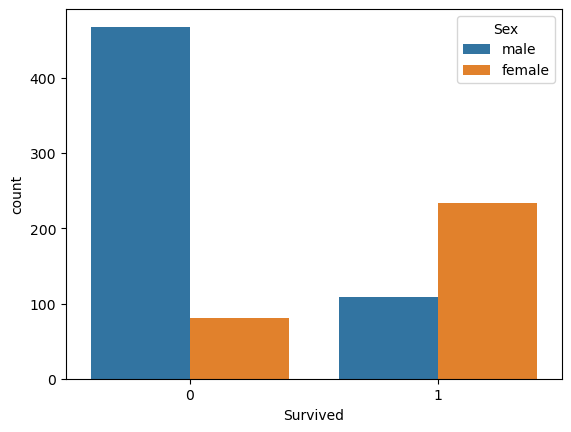

In [69]:
sns.countplot(x=df1['Survived'], hue=df1['Sex'])

Females survived twice as much as compared to Males.

C:\Users\USER\AppData\Local\Temp\ipykernel_22684\2570899483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'],bins=30)


<Axes: xlabel='Age', ylabel='Density'>

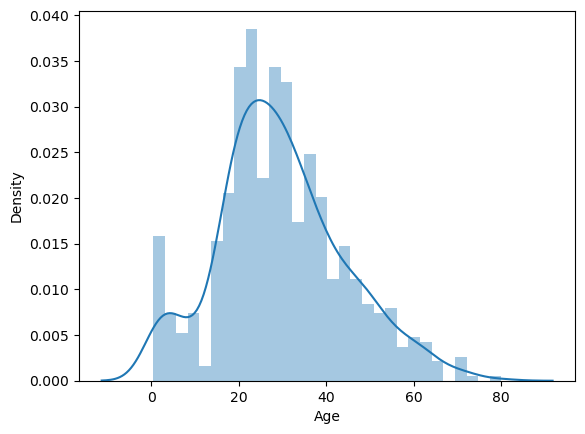

In [84]:
sns.distplot(df1['Age'],bins=30)

Most of the passengers are in the age range of 20 - 30

<Axes: xlabel='Survived', ylabel='count'>

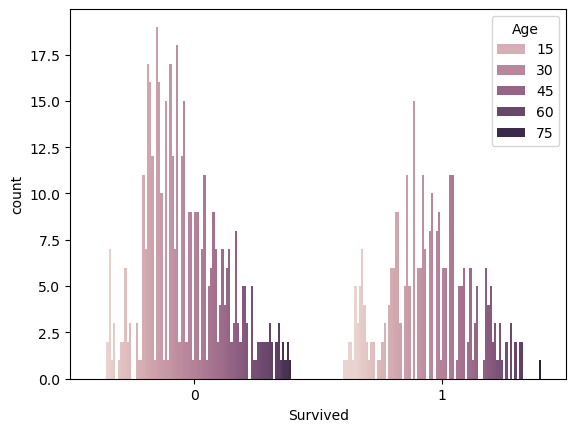

In [93]:
sns.countplot(x=df1['Survived'], hue=df1['Age'])

Most of the surviving passengers are about 30 - 45 years of age

C:\Users\USER\AppData\Local\Temp\ipykernel_22684\2166867994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Fare'],bins=50)


<Axes: xlabel='Fare', ylabel='Density'>

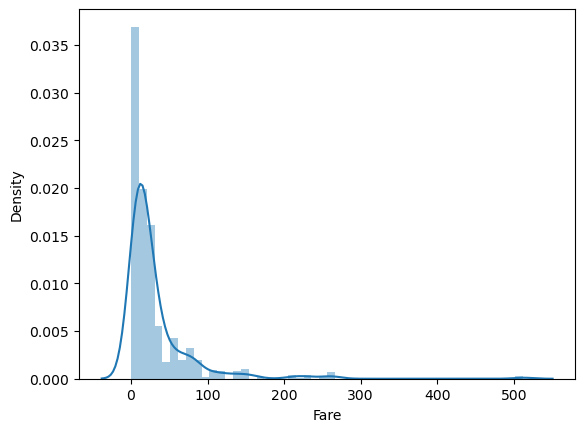

In [118]:
sns.distplot(df1['Fare'],bins=50)

Most of the passengers bought tickets that cost <20, which are safe to guess 3rd class tickets (currency not disclosed)

<Axes: xlabel='Survived', ylabel='count'>

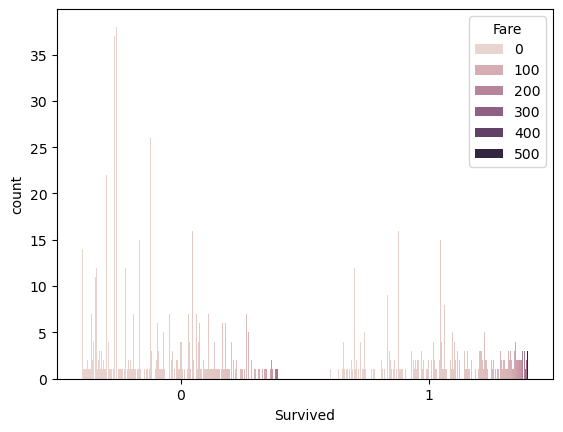

In [102]:
sns.countplot(x=df1['Survived'], hue=df1['Fare'])

From the graph, we can see that most of the survivors bought a ticket costing less than 100 (currency not disclosed)

### Data processing

In [234]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [222]:
df1 = df1.drop(['Cabin'], axis = 1)

In [236]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [238]:
df1['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [240]:
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])

In [242]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [244]:
df1.replace({'male':0, 'female':1}, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_22684\872409033.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'male':0, 'female':1}, inplace = True)


In [391]:
df1['Embarked'].replace({'C':0, 'Q':1, 'S':2}, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_22684\2223903822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Embarked'].replace({'C':0, 'Q':1, 'S':2}, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_22684\2223903822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Embarked

In [393]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [395]:
data=df1.drop(['Name','Ticket'], axis=1)

In [397]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


<Axes: >

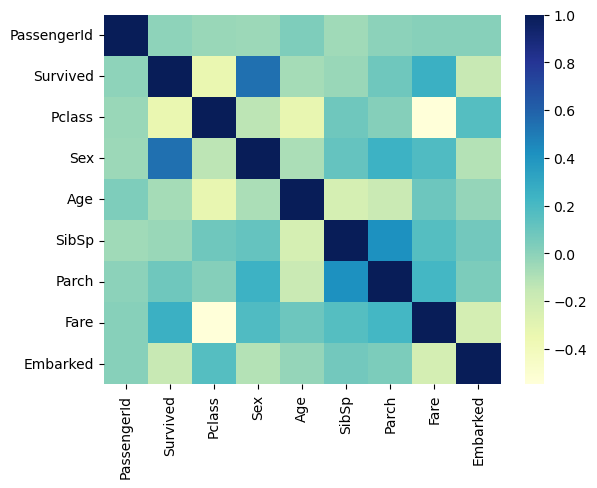

In [399]:
sns.heatmap(data.corr(),cmap='YlGnBu')

"Pclass", "Sex", "Fare" and "Embarked" columns have strong correlation with "Survived" column, while "Age" has a weak correlation with "Survived" column

### Model training

I am going to use Logistic Regression because it is better at predicting the probability of belonging to a particular category

In [443]:
data
xtrain=data.drop(['Survived'],axis=1)
ytrain=data[['Survived']]

In [445]:
xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,2
1,2,1,1,38.000000,1,0,71.2833,0
2,3,3,1,26.000000,0,0,7.9250,2
3,4,1,1,35.000000,1,0,53.1000,2
4,5,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,2
887,888,1,1,19.000000,0,0,30.0000,2
888,889,3,1,29.699118,1,2,23.4500,2
889,890,1,0,26.000000,0,0,30.0000,0


In [406]:
ytrain

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [447]:
xtrain = xtrain.drop(['PassengerId','SibSp','Parch'],axis=1)

In [449]:
xtrain

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.000000,7.2500,2
1,1,1,38.000000,71.2833,0
2,3,1,26.000000,7.9250,2
3,1,1,35.000000,53.1000,2
4,3,0,35.000000,8.0500,2
...,...,...,...,...,...
886,2,0,27.000000,13.0000,2
887,1,1,19.000000,30.0000,2
888,3,1,29.699118,23.4500,2
889,1,0,26.000000,30.0000,0


In [412]:
from sklearn.linear_model import LogisticRegression

In [451]:
lr=LogisticRegression()

In [453]:
lr.fit(xtrain,ytrain)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Model Prediction

Recall our "df2" dataframe. It is going to be used for testing.

In [312]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [314]:
df2.shape

(418, 11)

In [332]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [336]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [338]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

In [340]:
df2['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

In [342]:
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].mode()[0])

In [346]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [419]:
xtest = df2.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)

In [427]:
xtest = xtest.replace({'male':0,'female':1})

C:\Users\USER\AppData\Local\Temp\ipykernel_22684\466614580.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xtest = xtest.replace({'male':0,'female':1})


In [421]:
xtest['Embarked'] = xtest['Embarked'].replace({'C':0,'Q':1,'S':2})

C:\Users\USER\AppData\Local\Temp\ipykernel_22684\173326397.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xtest['Embarked'] = xtest['Embarked'].replace({'C':0,'Q':1,'S':2})


In [429]:
xtest

,Pclass,Sex,Age,Fare,Embarked
0,3,0,34.50000,7.8292,1
1,3,1,47.00000,7.0000,2
2,2,0,62.00000,9.6875,1
3,3,0,27.00000,8.6625,2
4,3,1,22.00000,12.2875,2
...,...,...,...,...,...
413,3,0,30.27259,8.0500,2
414,1,1,39.00000,108.9000,0
415,3,0,38.50000,7.2500,2
416,3,0,30.27259,8.0500,2


In [455]:
ypred = lr.predict(xtest)

In [457]:
print(ypred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [433]:
len(ypred)

418

In [459]:
df3 = pd.read_csv('gender_submission.csv')

In [368]:
df3.shape

(418, 2)

In [461]:
df3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [463]:
df3['Survived'] = ypred

In [439]:
df3.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [469]:
df3.to_csv('Titanic_prediction.csv', index=False)

#### Now the prediction is available as a ".csv" file